../images/CA/1/ORG_8bit.tif
../images/CA/1/ORG_bin.tif


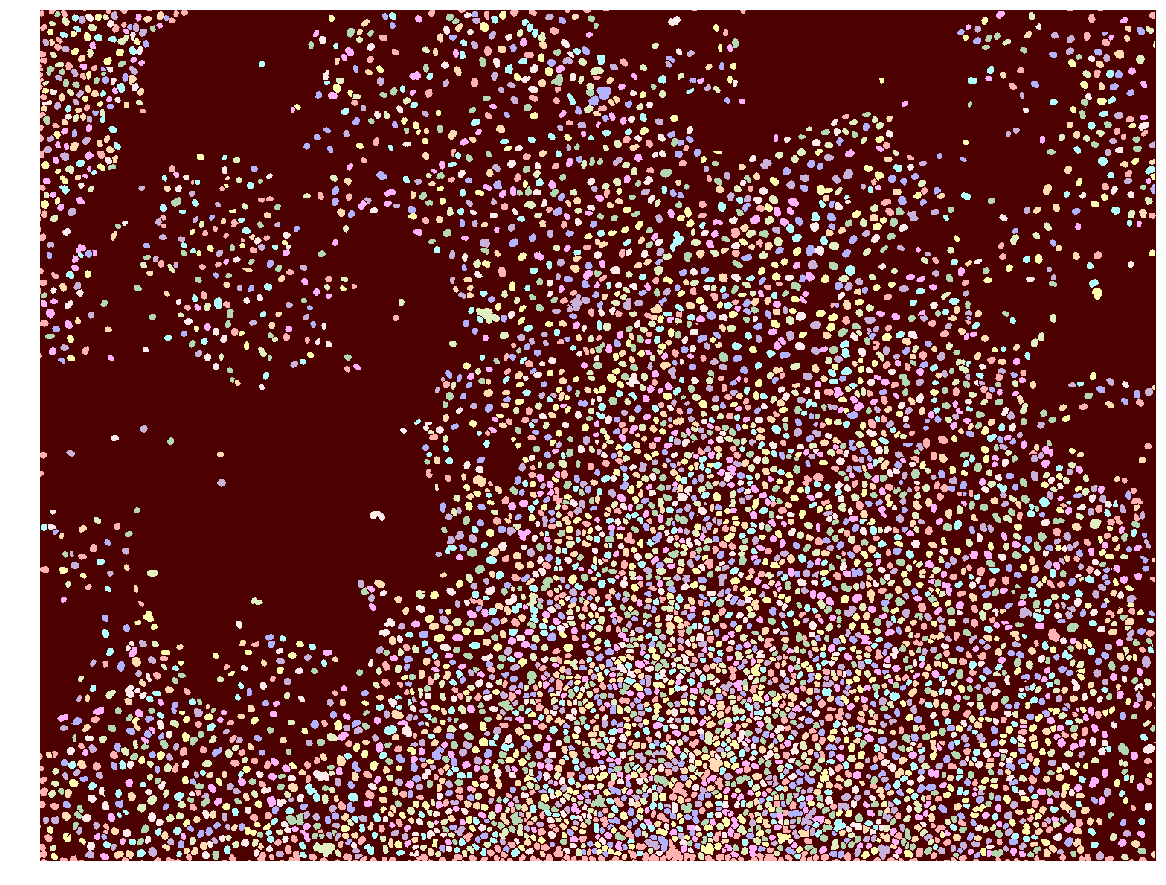

In [5]:
% matplotlib inline
import matplotlib.pyplot as plt
import image_features_extraction.Images as fe
import numpy as np
    
IMGS = fe.Images('../images/CA/1')


# the iterator at work ...
for IMG in IMGS:
    print(IMG.file_name())
    
IMG = IMGS.item(1)

IMG.set_image_intensity(IMGS.item(0))

imgrgb = IMG.get_image_segmentation()


fig, ax = plt.subplots(figsize=(20, 20))
ax.imshow(imgrgb)

ax.set_axis_off()
plt.show()

In [6]:
IMG = IMGS.item(0)

features = IMG.features(['label', 'area','perimeter', 'centroid'], class_value=5)

df = features.get_dataframe()

df.head()

# Get x and y coordinates (ra and dec from the dataframe) into a
# numpy array to feed to the VT method
width = imgrgb.shape[1]
height = imgrgb.shape[0]

y = [i for i in df.centroid_y]
x = [i for i in df.centroid_x]

XY = np.ceil([xy for xy in zip(x,y)])

dpi = 72.
xinch = width / dpi
yinch = height / dpi


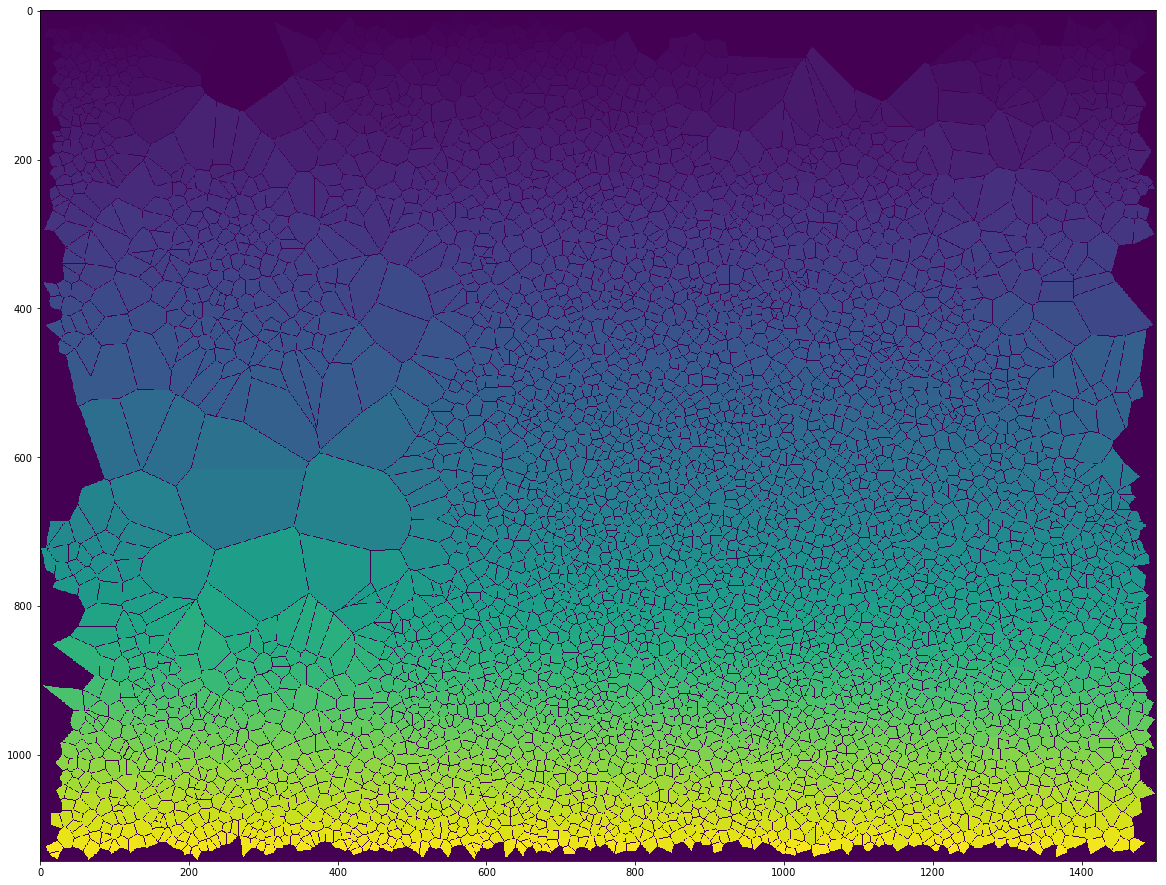

In [3]:
import Voronoi_Features.Voronoi as VF

vor = VF.Voronoi(XY, width, height)
IMG_VOR = vor.get_voronoi_map()

fig = plt.figure(figsize=(20,yinch))
plt.imshow(IMG_VOR)

In [7]:
Features = vor.features(['area','perimeter','centroid','bbox', 'eccentricity'])

In [8]:
df = Features.get_dataframe()
df

,id,area,perimeter,centroid_x,centroid_y,bbox,eccentricity
0,26,237,63.562446,15.510549,613.029536,"(2, 604, 25, 624)",0.716343
1,34,152,53.526912,13.388158,560.184211,"(3, 552, 22, 569)",0.774267
2,40,223,61.597980,16.062780,113.224215,"(4, 106, 29, 123)",0.815588
3,63,523,89.775649,26.531549,413.634799,"(7, 400, 43, 424)",0.752764
4,95,609,110.562446,31.576355,1385.561576,"(8, 1373, 48, 1398)",0.833256
5,31,2524,219.764502,46.742472,202.589540,"(10, 171, 86, 237)",0.834096
6,61,381,85.941125,28.687664,1478.543307,"(10, 1471, 48, 1486)",0.917151
7,52,70,32.763456,17.685714,153.357143,"(12, 148, 24, 158)",0.572667
8,50,322,72.740115,25.624224,664.027950,"(12, 654, 40, 676)",0.815086
9,76,389,80.254834,26.760925,1430.035990,"(12, 1419, 40, 1443)",0.812316


In [6]:

storage_name = '../images/VORO_DB1.csv' 
Features.save(storage_name, type_storage='file', do_append=True)
    

1